In [ ]:
Github Link: https://github.com/zainanwar6234/Zain_ML_KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

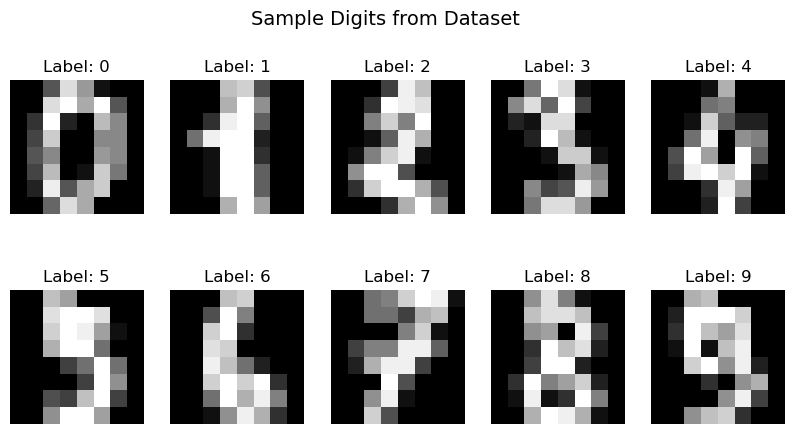

In [2]:
#Load Digits dataset from sklearn (similar to MNIST)
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")
plt.suptitle("Sample Digits from Dataset", fontsize=14)
plt.show()

In [3]:
#Normalize pixel values to range (0-1)
X = X / 16.0  

In [4]:
# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define k values to test
k_values = [1, 3, 5, 10, 20, 50]

In [6]:
#Train k-NN classifier for different k values and evaluate accuracy
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append((k, acc))
    print(f"k={k}, Accuracy={acc:.4f}")



k=1, Accuracy=0.9778
k=3, Accuracy=0.9833
k=5, Accuracy=0.9861
k=10, Accuracy=0.9833
k=20, Accuracy=0.9778
k=50, Accuracy=0.9583


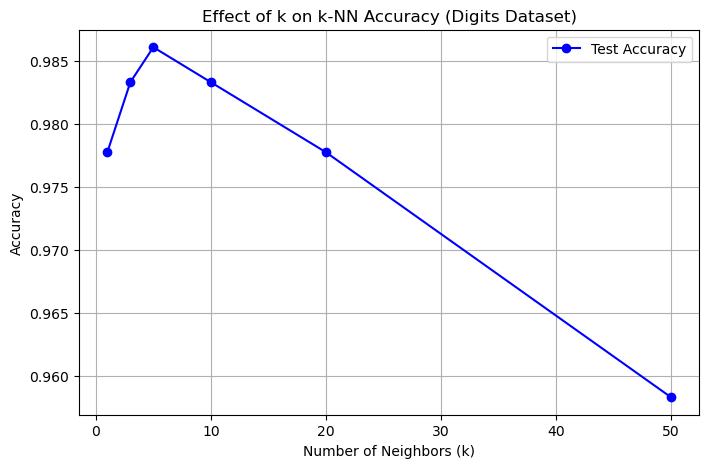

In [7]:
# Convert results to numpy array for better plotting
accuracy_scores = np.array(accuracy_scores)

plt.figure(figsize=(8, 5))
plt.plot(accuracy_scores[:, 0], accuracy_scores[:, 1], marker='o', linestyle='-', color='b', label="Test Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Effect of k on k-NN Accuracy (Digits Dataset)")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Choosing k=5 based on accuracy results
best_k = 5
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Generate classification report
print(f"Classification Report for k={best_k}:")
print(classification_report(y_test, y_pred_best))

Classification Report for k=5:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



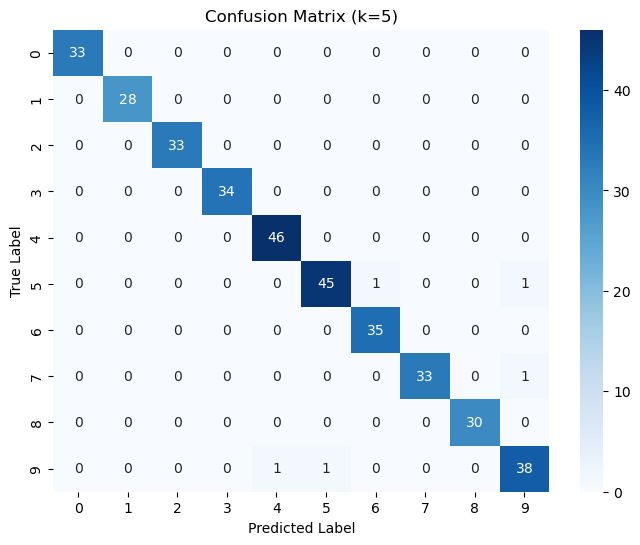

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()

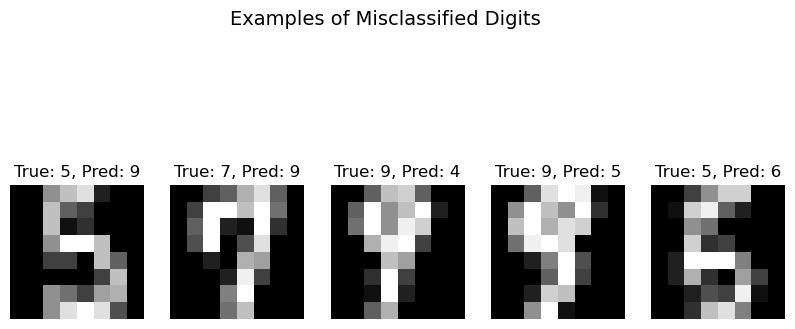

In [13]:
# Identify misclassified images
misclassified_indices = np.where(y_test != y_pred_best)[0]

# Adjust the number of plots based on available misclassified samples
num_misclassified = len(misclassified_indices)
num_to_display = min(10, num_misclassified)  # Show up to 10, or fewer if not available

# Display misclassified images dynamically
fig, axes = plt.subplots(1, num_to_display, figsize=(10, 5))
if num_to_display == 1:
    axes = [axes]  # Ensure axes is iterable if only 1 image

for i in range(num_to_display):
    idx = misclassified_indices[i]
    axes[i].imshow(X_test[idx].reshape(8, 8), cmap="gray")
    axes[i].set_title(f"True: {y_test[idx]}, Pred: {y_pred_best[idx]}")
    axes[i].axis("off")

plt.suptitle("Examples of Misclassified Digits", fontsize=14)
plt.show()